In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv')
data[['CabinA', 'CabinB', 'CabinC']] = data['Cabin'].str.split("/", expand=True)
to_drop = 'Name PassengerId Cabin'.split()
data = data.drop(columns=to_drop)
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinA,CabinB,CabinC
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [3]:
data.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    0
8690    0
8691    0
8692    0
Length: 8693, dtype: int64

In [4]:

data = data.dropna(subset=['Age'])
data = data.dropna(subset=['CabinA'])
data = data.dropna(subset=['CabinB'])
data = data.dropna(subset=['CabinC'])
data = data.dropna(subset=['CryoSleep'])
data = data.dropna(subset=['VIP'])


In [5]:

def fun_moda(df, feature):
  mode = df[feature].value_counts().index[0]
  df[feature] = df[feature].fillna(mode)

fun_moda(data, 'Destination')
fun_moda(data, 'HomePlanet')

In [6]:

def fun_mean(df, feature):
  mean = df[feature].mean()
  df[feature] = df[feature].fillna(mean) 

fun_mean(data,'RoomService')
fun_mean(data,'FoodCourt')
fun_mean(data,'ShoppingMall')
fun_mean(data,'Spa')
fun_mean(data,'VRDeck')

In [7]:
data.isna().sum(axis=0)

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinA          0
CabinB          0
CabinC          0
dtype: int64

In [8]:

cat_feats = 'HomePlanet Destination CabinA CabinC'.split()

def encode_categorical(df, feat):
  values = df[feat].unique()

  for v in values:
    new_col = feat + '_' + v
    data1 = (df[feat] == v).astype(int)

    df[new_col] = data1

  df = df.drop(columns=[feat])
  
  return df

for feat in cat_feats:
  data = encode_categorical(data, feat)

In [9]:
target_feat = 'Transported'

X = data.drop(columns=target_feat)
y = data[target_feat]

In [10]:
def k_fold(X, y, K, k):
  pre_mask = np.arange(y.size) % K
  val_mask = pre_mask == k

  X_val = X[val_mask]
  y_val = y[val_mask]
  X_train = X[~val_mask]
  y_train = y[~val_mask]

  return X_train, y_train, X_val, y_val

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
K = 10

accs = []
train_accs = []
depthes = np.arange(1, 30)
for depth in depthes:

  daccs = []
  dtrain_accs = []

  for k in range(K):
    X_train, y_train, X_val, y_val = k_fold(X, y, K, k)

    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    acc = np.mean(y_pred == y_val)
    daccs.append(acc)


    y_pred = model.predict(X_train)
    acc = np.mean(y_pred == y_train)
    dtrain_accs.append(acc)

  accs.append(np.mean(daccs))
  train_accs.append(np.mean(dtrain_accs))

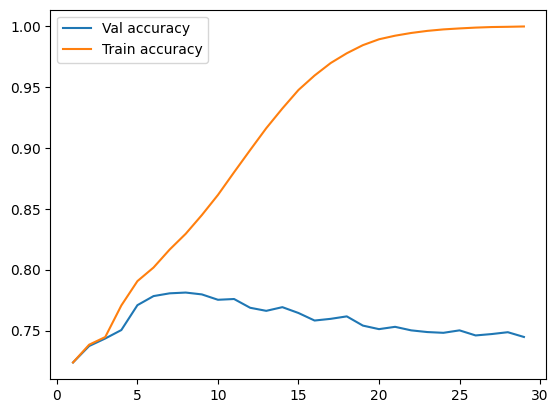

In [13]:
plt.plot(depthes, accs, label='Val accuracy')
plt.plot(depthes, train_accs, label='Train accuracy')

plt.legend()

In [14]:
train_accs

[0.7237855298640785,
 0.7383806840764989,
 0.7446619902487306,
 0.7705993935118968,
 0.7906063438212148,
 0.8017526149069452,
 0.8165020920120467,
 0.829484836578685,
 0.844823094793979,
 0.8613671151101588,
 0.8799720580188659,
 0.8982265526426468,
 0.9161725646338666,
 0.9323519620284069,
 0.9475499029378435,
 0.9594251092868227,
 0.9696738925404101,
 0.977693509246911,
 0.9843531923184674,
 0.9891761738883339,
 0.9921204430931286,
 0.994363693854895,
 0.9960742212362987,
 0.9972940164437579,
 0.9980931821078538,
 0.9987661815144495,
 0.9992288612351224,
 0.9994251458487755,
 0.9996915488185809]

In [15]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

0.9997196130660311